In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
!ls
#load data
data = np.loadtxt('housing.txt')
print(data.shape)

Boston-adaptive learning rate.ipynb  boston.ipynb
Boston-batch-adpative learning.ipynb housing.names.txt
Boston-batch.ipynb                   housing.txt
(506, 14)


In [3]:
#separate data into inputs and outputs
x = data[:,:13]
y = data[:,13]

print(x.shape)
print(y.shape)

(506, 13)
(506,)


In [4]:
#normalize inputs
#print(x.shape)
for i in range(x.shape[1]):
    #print(i)
    t = x[:,i]
    x[:,i] = (t - np.min(t))/(np.max(t) - np.min(t))


In [5]:
#add bias term
b = np.ones((x.shape[0],1))
x = np.hstack((x,b))
print(x.shape)

(506, 14)


In [6]:
print(x[:5,:])

[[0.00000000e+00 1.80000000e-01 6.78152493e-02 0.00000000e+00
  3.14814815e-01 5.77505269e-01 6.41606591e-01 2.69203139e-01
  0.00000000e+00 2.08015267e-01 2.87234043e-01 1.00000000e+00
  8.96799117e-02 1.00000000e+00]
 [2.35922539e-04 0.00000000e+00 2.42302053e-01 0.00000000e+00
  1.72839506e-01 5.47997701e-01 7.82698249e-01 3.48961980e-01
  4.34782609e-02 1.04961832e-01 5.53191489e-01 1.00000000e+00
  2.04470199e-01 1.00000000e+00]
 [2.35697744e-04 0.00000000e+00 2.42302053e-01 0.00000000e+00
  1.72839506e-01 6.94385898e-01 5.99382080e-01 3.48961980e-01
  4.34782609e-02 1.04961832e-01 5.53191489e-01 9.89737254e-01
  6.34657837e-02 1.00000000e+00]
 [2.92795719e-04 0.00000000e+00 6.30498534e-02 0.00000000e+00
  1.50205761e-01 6.58555279e-01 4.41812564e-01 4.48544590e-01
  8.69565217e-02 6.67938931e-02 6.48936170e-01 9.94276060e-01
  3.33885210e-02 1.00000000e+00]
 [7.05070075e-04 0.00000000e+00 6.30498534e-02 0.00000000e+00
  1.50205761e-01 6.87104809e-01 5.28321318e-01 4.48544590e-01


In [7]:
xtr,xte,ytr,yte = train_test_split(x,y,test_size=0.3)
ytr = ytr.reshape(ytr.shape[0],1)
yte = yte.reshape(yte.shape[0],1)

In [8]:
#uniform random initialization of weights
w = np.random.uniform(0.0,1.0,x.shape[1]).reshape(x.shape[1],1)
print(w)
print(w.shape)

[[0.93520071]
 [0.40254224]
 [0.61417429]
 [0.35400539]
 [0.87917776]
 [0.73353871]
 [0.64080049]
 [0.85904271]
 [0.05811037]
 [0.50864571]
 [0.91817909]
 [0.80773521]
 [0.1356905 ]
 [0.91399732]]
(14, 1)


In [9]:
#define hyper-parameters
epochs = 100
a = 0.2

In [10]:
#linear regression with constant learning rate 
train_acc = []
test_acc = []

m = xtr.shape[0]
n = xtr.shape[1]

mte = xte.shape[0]

for i in range(epochs):
    batch = 20
    for k in range(batch):
        
        l = m//batch
        if(k<batch-1):
            x_bar = xtr[k*l:k*l+l,:]
            y_bar = ytr[k*l:k*l+l,:]
            y_bar = y_bar.reshape(y_bar.shape[0],1)
        else:
            x_bar = xtr[k*l:,:]
            y_bar = ytr[k*l:,:]
            y_bar = y_bar.reshape(y_bar.shape[0],1)
            
        y_pred = np.dot(x_bar,w)
        mtr = x_bar.shape[0]
        #mse error in training set
        err = np.sum((y_pred - y_bar)**2)/(2*mtr)
        train_acc.append(err)

        #mse error in test set
        tmp = np.dot(xte,w)
        tmp_err = np.sum((tmp - yte)**2)/(2*mte)
        test_acc.append(tmp_err)

        #calculate gradient
        del_y = y_pred - y_bar

        for j in range(n):
            xcurr = x_bar[:,j]
            xcurr = xcurr.reshape(xcurr.shape[0],1)
            del_w = (sum(del_y[:]*xcurr[:]))/(mtr)
            #reduction factor
            rf = 1 + i/100
            w[j] = w[j] - (a/rf)*del_w

    if(i%10 == 0):
        print("Train Error", err)
        print("Test Error", tmp_err)

Train Error 28.5581845830147
Test Error 29.735984728096653
Train Error 11.247709586580898
Test Error 13.14707925934171
Train Error 10.778113667028576
Test Error 11.774037078605105
Train Error 10.620321140349876
Test Error 11.310814365911833
Train Error 10.456479039508592
Test Error 11.028404146064466
Train Error 10.299789648643987
Test Error 10.822982466549885
Train Error 10.159349683542677
Test Error 10.663997244799909
Train Error 10.03570843109237
Test Error 10.536480488610499
Train Error 9.926732306643984
Test Error 10.431454087001732
Train Error 9.829971074316383
Test Error 10.343116018260112


<IPython.core.display.Javascript object>


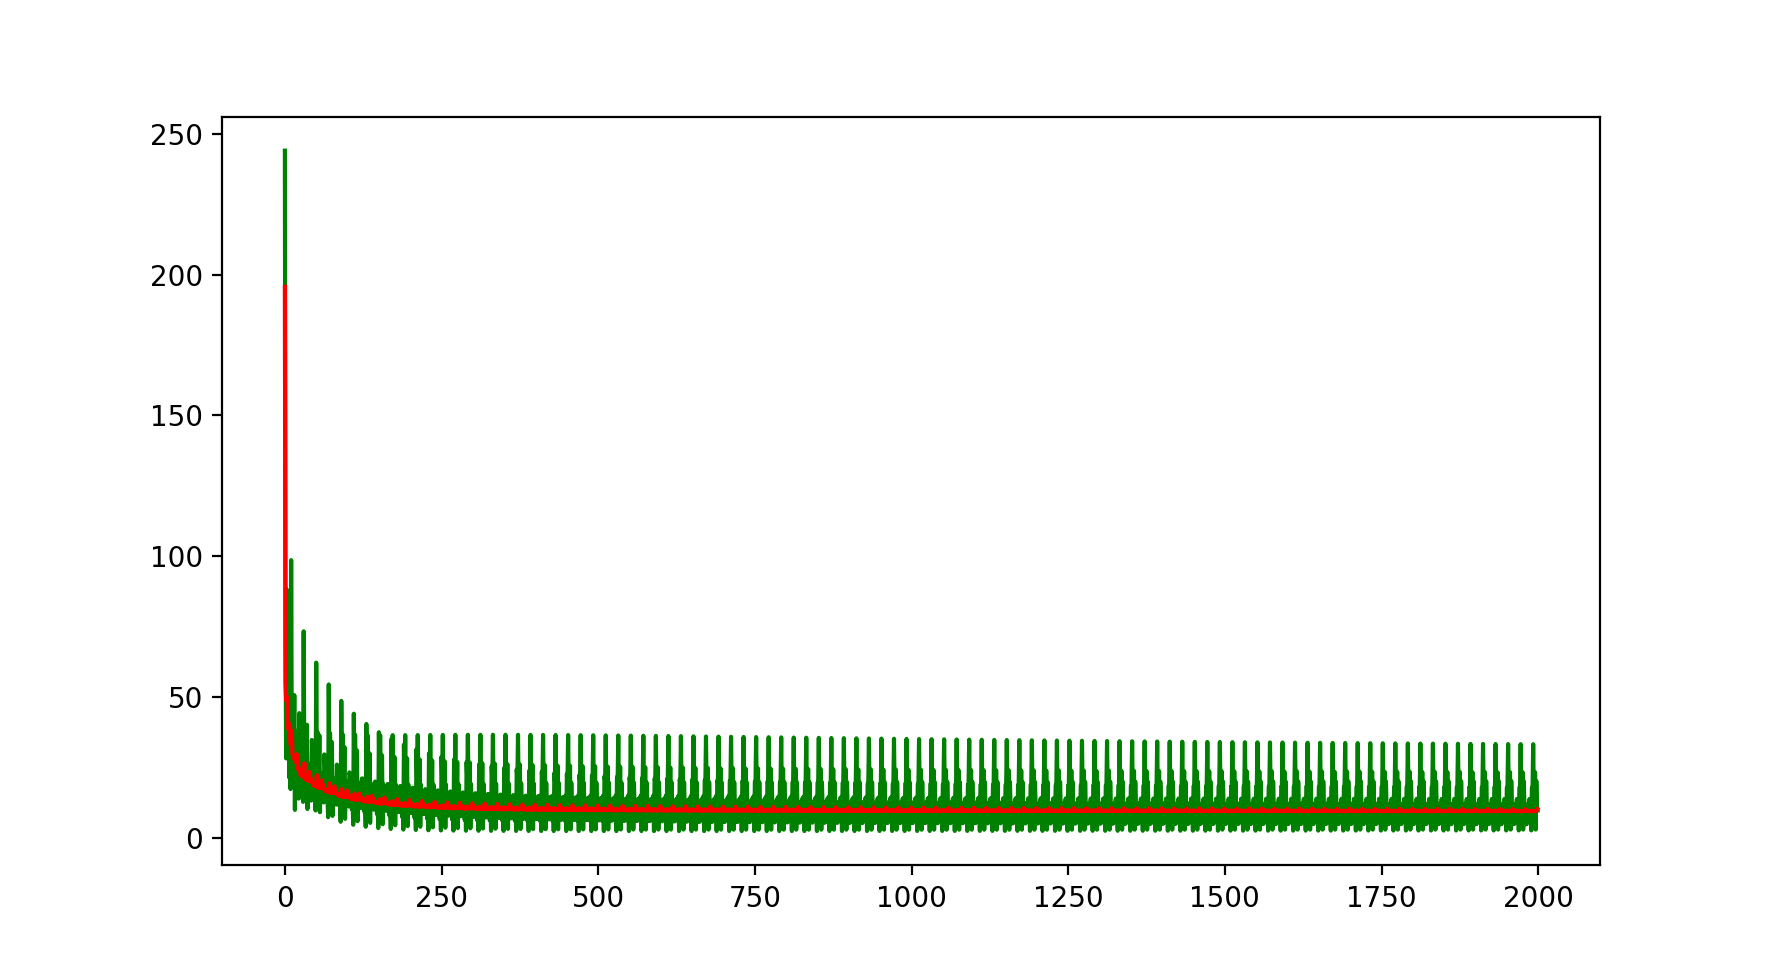

In [12]:
x_axis = np.arange(len(test_acc))
import matplotlib.pyplot as plt
%matplotlib notebook
plt.plot(x_axis,train_acc,'g')
plt.plot(x_axis,test_acc,'r')
plt.show()